In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
future_contract = symbols('NGF18')

In [4]:
future_contract.asset_name

'Natural Gas'

In [5]:
for key in future_contract.to_dict():
    print(key)
    print(future_contract.to_dict()[key])
    print('\n')

root_symbol
NG


symbol
NGF18


end_date
2017-12-27 00:00:00+00:00


multiplier
10000.0


exchange
NYMEX


expiration_date
2017-12-27 00:00:00+00:00


start_date
2010-08-24 00:00:00+00:00


sid
1061201801


first_traded
None


notice_date
2017-12-28 00:00:00+00:00


exchange_info
ExchangeInfo('NYMEX', 'NYMEX', 'US')


tick_size
0.001


asset_name
Natural Gas


exchange_full
NYMEX


auto_close_date
2017-12-22 00:00:00+00:00




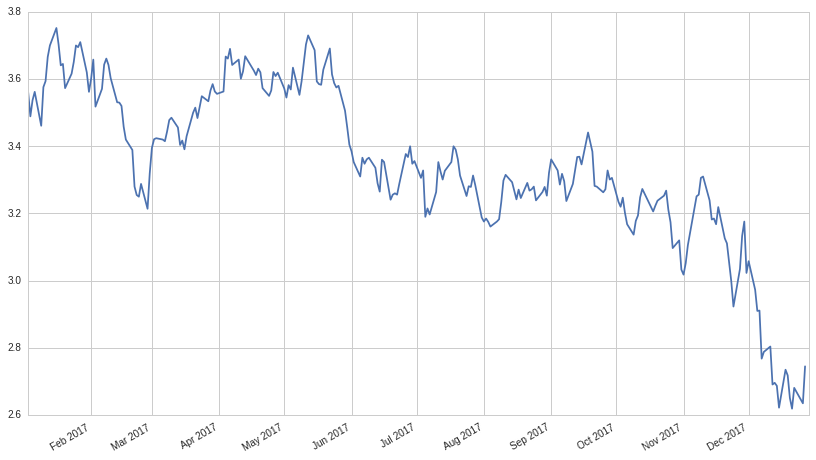

In [6]:
futures_position_value = get_pricing(future_contract, 
                                     start_date = '2017-01-01', 
                                     end_date = '2018-01-01', 
                                     fields = 'price')

futures_position_value.name = futures_position_value.name.symbol
futures_position_value.plot()

In [7]:
from quantopian.research.experimental import history

In [8]:
ngf18 = future_contract

In [9]:
ngf18_data = history(ngf18, 
                     fields=['price', 'open_price', 'high', 'low', 'close_price', 'volume', 'contract'], 
                     frequency='daily', 
                     start='2017-06-01', 
                     end='2017-08-01')

In [10]:
ngf18_data.head()

,price,open_price,high,low,close_price,volume,contract
2017-06-01 00:00:00+00:00,3.385,3.412,3.435,3.341,3.385,5497.0,Future(1061201801 [NGF18])
2017-06-02 00:00:00+00:00,3.353,3.386,3.386,3.336,3.353,2443.0,Future(1061201801 [NGF18])
2017-06-05 00:00:00+00:00,3.310,3.373,3.378,3.298,3.310,2457.0,Future(1061201801 [NGF18])
2017-06-06 00:00:00+00:00,3.366,3.318,3.371,3.307,3.366,2061.0,Future(1061201801 [NGF18])
2017-06-07 00:00:00+00:00,3.348,3.370,3.393,3.342,3.348,1834.0,Future(1061201801 [NGF18])


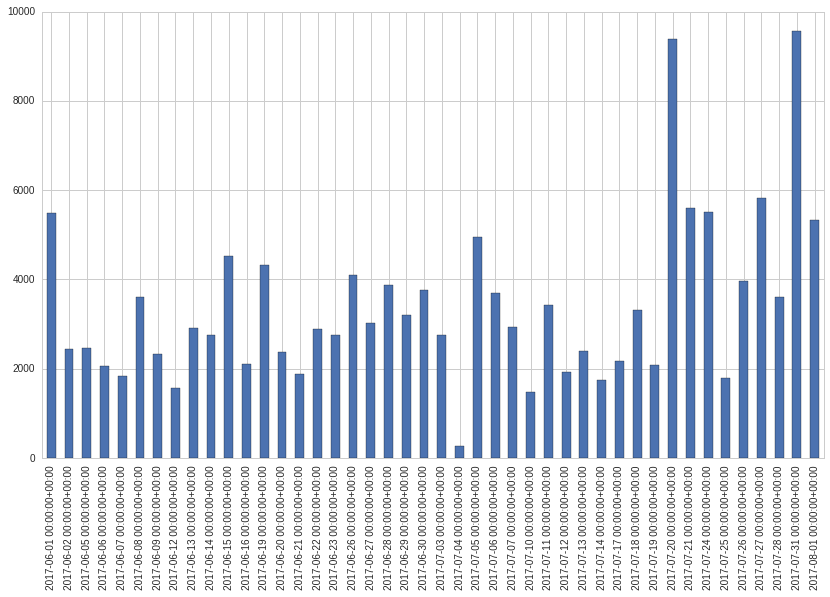

In [11]:
ngf18_data['volume'].plot(kind='bar')

In [12]:
ng_contracts = symbols(['NGF17','NGG17','NGH17','NGI17','NGJ17','NGK17'])

In [14]:
ng_consecutive_contract_volume = history(ng_contracts,
                                        fields='volume',
                                        frequency='daily',
                                        start='2016-01-01',
                                        end='2017-08-01')

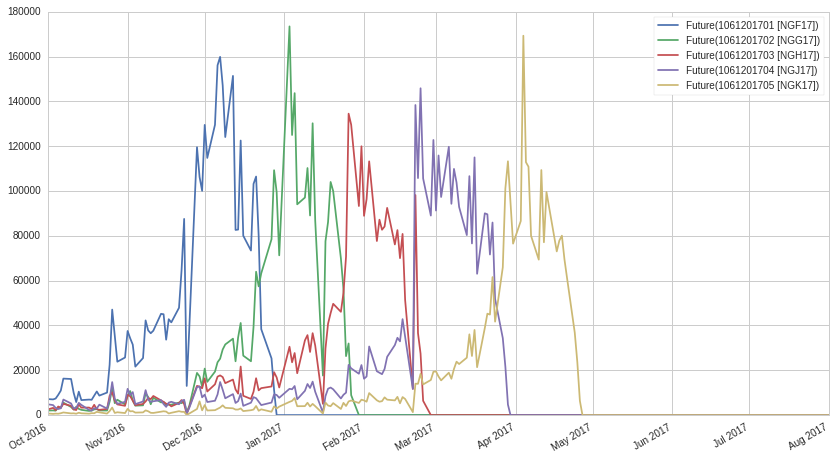

In [15]:
ng_consecutive_contract_volume.plot(xlim=['2016-10-01','2017-08-01'])

**Trading activity based on volume increases near the maturity date of each contract
We can make a continuous future which will allow us to see several futures contracts combined together
to create a long term chart**

In [16]:
from quantopian.research.experimental import continuous_future

In [17]:
continuous_ng = continuous_future('NG', offset=0,roll='volume',adjustment='mul')

In [18]:
ng_cont_active = history(continuous_ng,
                        fields=['contract','price','volume'],
                        frequency='daily',
                        start='2016-10-01',
                        end='2017-08-01')

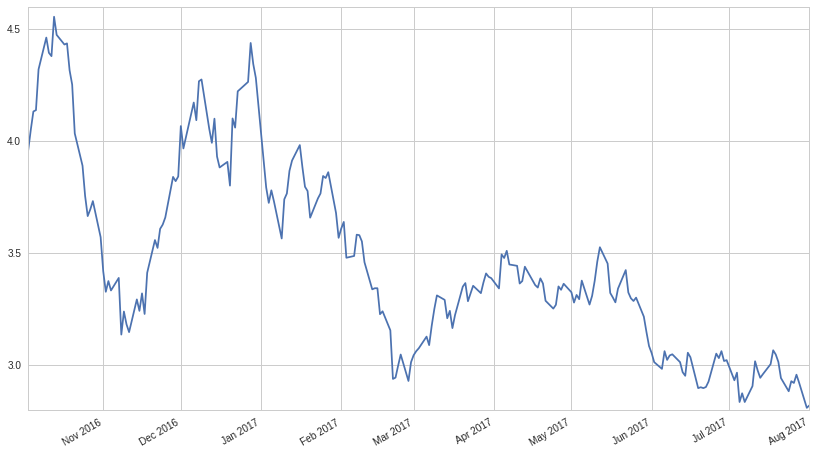

In [19]:
ng_cont_active['price'].plot();

In [20]:
ng_consecutive_contract_volume = history(ng_contracts,
                        fields='volume',
                        frequency='daily',
                        start='2016-10-01',
                        end='2017-08-01')

**Looking at consecutive contracts on top of contiuous contracts, both with regard to volume
This will show how the price changes for multiple contracts over time**

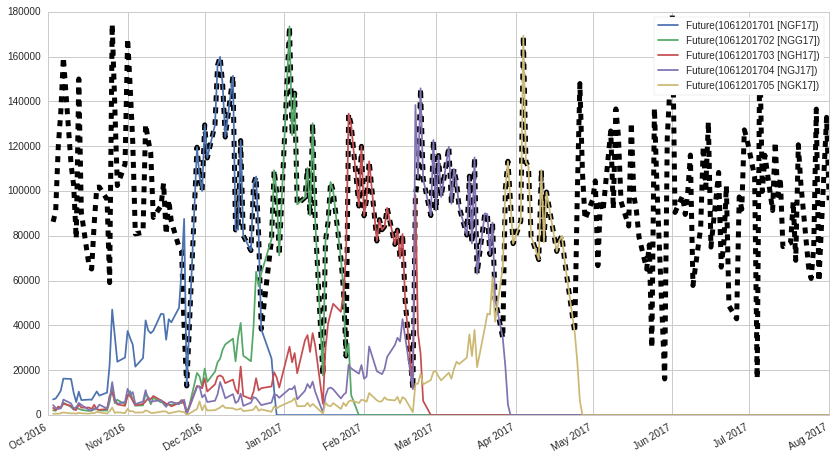

In [21]:
ax = ng_cont_active['volume'].plot(ls='--',c='black',lw=5)
ng_consecutive_contract_volume.plot(ax=ax,xlim=['2016-10-01','2017-08-01'])

In [23]:
ng_consecutive_contract_price = history(ng_contracts,
                        fields='price',
                        frequency='daily',
                        start='2016-10-01',
                        end='2017-08-01')

#The continuous price is adjusted so we need to unadjust that
continuous_ng_unadjusted = continuous_future('NG',
                                            offset=0,
                                            roll='volume',
                                            adjustment=None)
ng_unadjusted_history = history(continuous_ng_unadjusted,
                        fields=['contract','price'],
                        frequency='daily',
                        start='2016-10-01',
                        end='2017-08-01')

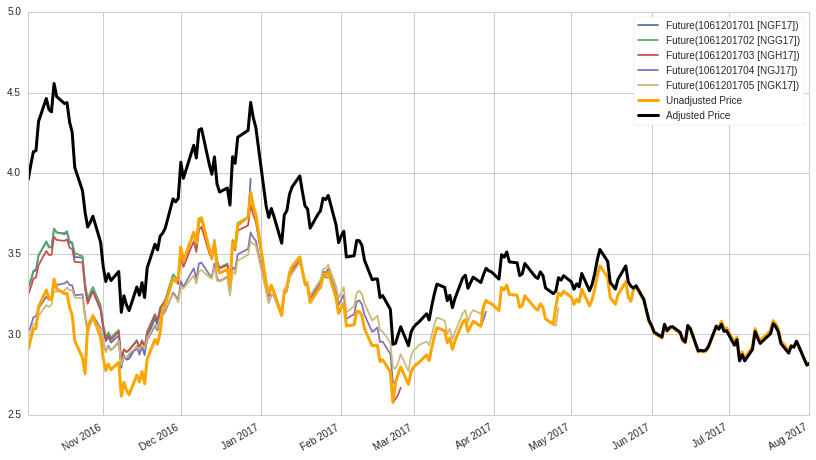

In [24]:
ng_consecutive_contract_price.plot()
ng_unadjusted_history['price'].plot(c='orange',lw=3)
ng_cont_active['price'].plot(c='black',lw=3).legend('Unadjusted Price')
legend = plt.legend()
legend.get_texts()[-1].set_text('Adjusted Price')
legend.get_texts()[-2].set_text('Unadjusted Price')

**Pivot table will show when each future starts and then reaches maturity**


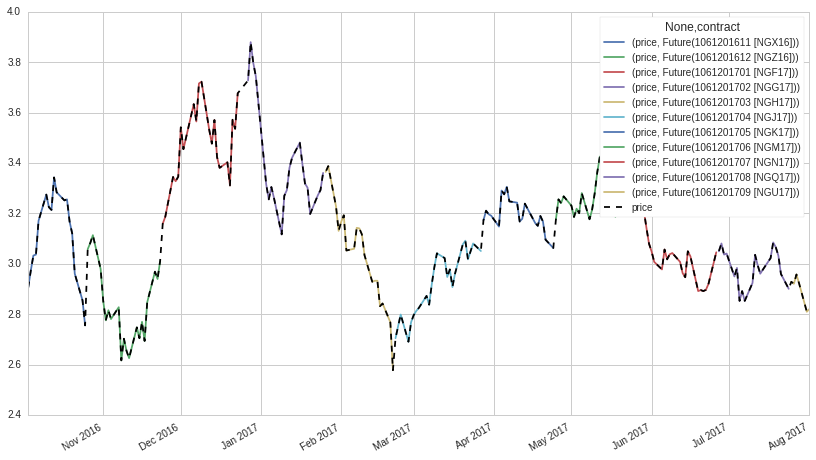

In [123]:
pivot_unadj = ng_unadjusted_history.pivot(index=ng_unadjusted_history.index,
                                        columns='contract')
ax = pivot_unadj.plot()
ng_unadjusted_history.plot(ax=ax,ls='--',c='black')